#### Set Up

In [71]:
## imports and dependencies 

# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# accuracy measures
from sklearn.metrics import mean_absolute_error

# train-test
from sklearn.model_selection import train_test_split

#### Data

In [72]:
# data 
df = pd.read_csv('../../data/dataset_imputed.csv', encoding='latin1')

In [73]:
# reduced dataset 
df = df[["Weekly Gross", "Club", "Pos"]]
df['Ln Weekly Gross'] = np.log(df['Weekly Gross'])
df.head()

,Weekly Gross,Club,Pos,Ln Weekly Gross
0,83987,Inter Milan,"MF,DF",11.338417
1,19502,Sampdoria,MF,9.878272
2,17980,Sampdoria,MF,9.797015
3,14999,Bologna,MF,9.615739
4,20993,Torino,FW,9.951944


In [74]:
# missing values
df.isna().sum().sum()

0

#### Models [Naive]

In [75]:
# baseline model 1 - global mean ln weekly gross wage
df1 = df.copy() 
avg_ln = df1['Ln Weekly Gross'].mean()
avg_reg = df1['Weekly Gross'].mean()
df1['Predicted Ln Weekly Gross'] = avg_ln
mae1 = mean_absolute_error(df1['Ln Weekly Gross'], df1['Predicted Ln Weekly Gross'])
mae1, avg_ln, avg_reg

(0.7193830805118173, 10.27378294119638, 43555.59901599016)

In [76]:
# baseline model 2 - club 
df2 = df.copy()

club_wages_dict = {}
club_count_dict = {}
club_avg_dict = {}

for index, row in df2.iterrows():
    if row["Club"] in club_wages_dict:
        club_wages_dict[row["Club"]] += row["Ln Weekly Gross"]
        club_count_dict[row["Club"]] += 1
    else:
        club_wages_dict[row["Club"]] = row["Ln Weekly Gross"]
        club_count_dict[row["Club"]] = 1

for key, value in club_wages_dict.items():
    club_avg_dict[key] = value/club_count_dict[key]

sorted_club_avg_dict = dict(sorted(club_avg_dict.items(), key=lambda item: item[1],reverse=True))

df2['Predicted Ln Weekly Gross'] = 0

for i in range(len(df2)):
    df2.at[i,'Predicted Ln Weekly Gross'] = sorted_club_avg_dict[df2["Club"].iloc[i]]   

mae2 = mean_absolute_error(df2['Ln Weekly Gross'], df2['Predicted Ln Weekly Gross'])
mae2

0.46376664776879306

In [77]:
# baseline model 3 - position
df3 = df.copy()

pos_wages_dict = {}
pos_count_dict = {}
pos_avg_dict = {}

for index, row in df3.iterrows():
    if row["Pos"] in pos_wages_dict:
        pos_wages_dict[row["Pos"]] += row["Ln Weekly Gross"]
        pos_count_dict[row["Pos"]] += 1
    else:
        pos_wages_dict[row["Pos"]] = row["Ln Weekly Gross"]
        pos_count_dict[row["Pos"]] = 1

for key, value in pos_wages_dict.items():
    pos_avg_dict[key] = value/pos_count_dict[key]

sorted_pos_avg_dict = dict(sorted(pos_avg_dict.items(), key=lambda item: item[1],reverse=True))

df3['Predicted Ln Weekly Gross'] = 0

for i in range(len(df3)):
    df3.at[i,'Predicted Ln Weekly Gross'] = pos_avg_dict[df3["Pos"].iloc[i]]   

mae3 = mean_absolute_error(df3['Ln Weekly Gross'], df3['Predicted Ln Weekly Gross'])
mae3

0.7000154603859715

In [100]:
sorted_pos_avg_dict

{'FW': 10.698453546069345,
 'SS': 10.677837117028002,
 'RW': 10.58054790017024,
 'CF': 10.532828756914688,
 'RM': 10.427056390524468,
 'FW,DF': 10.412830749721383,
 'DM': 10.374062782750897,
 'MF': 10.31648969609023,
 'AM': 10.313084953358402,
 'FW,MF': 10.25945611308361,
 'LM': 10.243414668917916,
 'CM': 10.215069926909763,
 'DF': 10.187794992476576,
 'CB': 10.16382989251373,
 'LW': 10.099000667150102,
 'RB': 10.045917124206113,
 'LB': 10.011686697183928,
 'MF,DF': 9.807089086964808}

In [78]:
# baseline model 4 - club and position
df4 = df.copy()

club_pos_wages_dict = {}
club_pos_count_dict = {}
club_pos_avg_dict = {}

for index, row in df4.iterrows():
    if str(row["Club"] + row["Pos"]) in club_pos_wages_dict:
        club_pos_wages_dict[str(row["Club"] + row["Pos"])] += row["Ln Weekly Gross"]
        club_pos_count_dict[str(row["Club"] + row["Pos"])] += 1
    else:
        club_pos_wages_dict[str(row["Club"] + row["Pos"])] = row["Ln Weekly Gross"]
        club_pos_count_dict[str(row["Club"] + row["Pos"])] = 1

for key, value in club_pos_wages_dict.items():
    club_pos_avg_dict[key] = value/club_pos_count_dict[key]

sorted_club_pos_avg_dict = dict(sorted(club_pos_avg_dict.items(), key=lambda item: item[1],reverse=True))

df4['Predicted Ln Weekly Gross'] = 0

for i in range(len(df4)):
    df4.at[i,'Predicted Ln Weekly Gross'] = club_pos_avg_dict[str(df4["Club"].iloc[i] + df4["Pos"].iloc[i])]   

mae4 = mean_absolute_error(df4['Ln Weekly Gross'], df4['Predicted Ln Weekly Gross'])
mae4

0.38426652693354074

#### Models [Train-Test]

In [79]:
# baseline model 1
df1 = df.copy() 
avg_ln = df1['Ln Weekly Gross'].mean()
avg_reg = df1['Weekly Gross'].mean()
df1['Predicted Ln Weekly Gross'] = avg_ln
mae_test1 = mean_absolute_error(df1['Ln Weekly Gross'], df1['Predicted Ln Weekly Gross'])
mae1, avg_ln, avg_reg

(0.7193830805118173, 10.27378294119638, 43555.59901599016)

In [80]:
# baseline model 2
df2 = df.copy()

train_df, test_df = train_test_split(df2, test_size=0.2, random_state=42)

train_club_wages_dict = {}
train_club_count_dict = {}
train_club_avg_dict = {}

for index, row in train_df.iterrows():
    if row["Club"] in train_club_wages_dict:
        train_club_wages_dict[row["Club"]] += row["Ln Weekly Gross"]
        train_club_count_dict[row["Club"]] += 1
    else:
        train_club_wages_dict[row["Club"]] = row["Ln Weekly Gross"]
        train_club_count_dict[row["Club"]] = 1

for key, value in train_club_wages_dict.items():
    train_club_avg_dict[key] = value / train_club_count_dict[key]

sorted_train_club_avg_dict = dict(sorted(train_club_avg_dict.items(), key=lambda item: item[1], reverse=True))

club_avg_salary = train_df.groupby("Club")["Ln Weekly Gross"].mean().reset_index()
club_avg_salary = club_avg_salary.rename(columns={"Ln Weekly Gross": "ClubAvgSalary"})

test_df = test_df.merge(club_avg_salary, on="Club", how="left")

test_df["ClubAvgSalary"].fillna(10.274, inplace=True)

mae_test2 = mean_absolute_error(test_df['Ln Weekly Gross'], test_df['ClubAvgSalary'])
mae_test2

0.4869158048251256

In [81]:
sorted_club_avg_dict

{'Juventus': 11.626440185681941,
 'Inter Milan': 11.25955580304691,
 'Roma': 11.008116802121643,
 'Napoli': 10.90410053197264,
 'AC Milan': 10.74160915065746,
 'Lazio': 10.640235521852427,
 'Monza': 10.63979000341,
 'Fiorentina': 10.260210783073513,
 'Torino': 10.149813887577311,
 'Atalanta': 10.059898071797734,
 'Lecce': 9.988462679067101,
 'Bologna': 9.8959140523068,
 'Cagliari': 9.893657065989112,
 'Genoa': 9.846932322889774,
 'Parma': 9.828187556706418,
 'Sampdoria': 9.78476063564956,
 'Sassuolo': 9.624371966082755,
 'Udinese': 9.513811136750657,
 'Hellas Verona': 9.508363109433304,
 'SPAL': 9.493108543812875,
 'Crotone': 9.45688790106941,
 'Empoli': 9.434043846121346,
 'Salernitana': 9.396556491784974,
 'Chievo Verona': 9.302999906463633,
 'Spezia': 9.03856837755696}

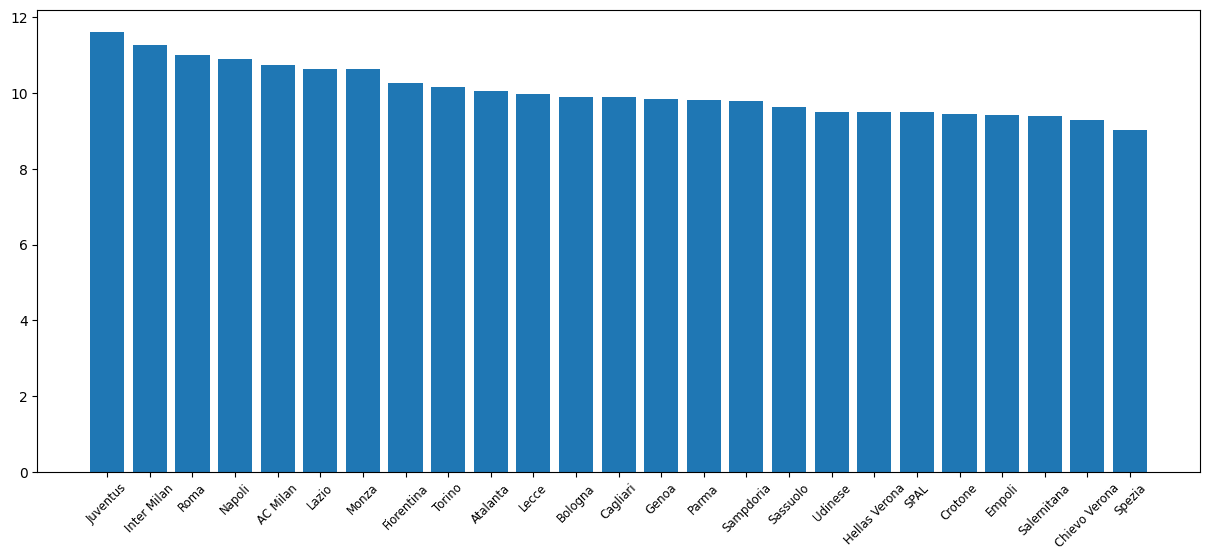

In [82]:
fig1, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(range(len(club_avg_dict)), club_wages, tick_label=clubs)
ax1.set_xticklabels(clubs, rotation=45, fontsize='small')
plt.show()

In [83]:
# baseline model 3
df3 = df.copy()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_pos_wages_dict = {}
train_pos_count_dict = {}
train_pos_avg_dict = {}

for index, row in df3.iterrows():
    if row["Pos"] in pos_wages_dict:
        pos_wages_dict[row["Pos"]] += row["Ln Weekly Gross"]
        pos_count_dict[row["Pos"]] += 1
    else:
        pos_wages_dict[row["Pos"]] = row["Ln Weekly Gross"]
        pos_count_dict[row["Pos"]] = 1

for key, value in train_pos_wages_dict.items():
    train_pos_avg_dict[key] = value/train_pos_count_dict[key]

sorted_train_pos_avg_dict = dict(sorted(train_pos_avg_dict.items(), key=lambda item: item[1],reverse=True))

pos_avg_salary = train_df.groupby("Pos")["Ln Weekly Gross"].mean().reset_index()
pos_avg_salary = pos_avg_salary.rename(columns={"Ln Weekly Gross": "PosAvgSalary"})

test_df = test_df.merge(pos_avg_salary, on="Pos", how="left")

test_df["PosAvgSalary"].fillna(10.274, inplace=True)

mae_test3 = mean_absolute_error(test_df['Ln Weekly Gross'], test_df['PosAvgSalary'])
mae_test3

0.7427348745886144

In [99]:
sorted_train_pos_avg

NameError: name 'sorted_pos_avg' is not defined

In [85]:
y1_min, y1_max = ax1.get_ylim()
max_club_avg = list(sorted_club_avg_dict.values())[0]
min_club_avg = list(sorted_club_avg_dict.values())[-1]

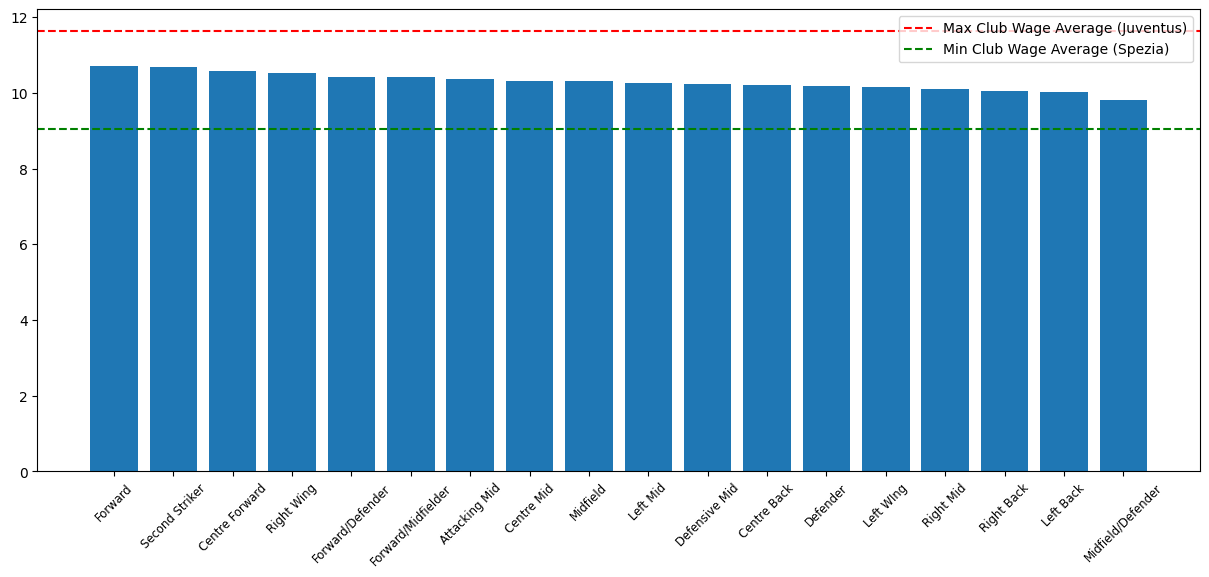

In [97]:
fig2, ax2 = plt.subplots(figsize=(15, 6))
ax2.set_ylim(y1_min, y1_max)
ax2.bar(range(len(pos_wages)), pos_wages, tick_label=pos)
ax2.set_xticklabels(pos, rotation=45, fontsize='small')
max_line = plt.axhline(y=max_club_avg, color='r', ls='--',label='Max Club Wage Average (Juventus)')
min_line = plt.axhline(y=min_club_avg, color='g',ls='--',label='Min Club Wage Average (Spezia)')
ax2.legend()
plt.savefig('average_wages.png',pad_inches=3)
plt.show()

In [87]:
# baseline model #4
df4 = df.copy()

club_pos_wages_dict = {}
club_pos_count_dict = {}
club_pos_avg_dict = {}

train_df, test_df = train_test_split(df4, test_size=0.2, random_state=42)

for index, row in train_df.iterrows():
    key = str(row["Club"] + row["Pos"])
    if key in club_pos_wages_dict:
        club_pos_wages_dict[key] += row["Ln Weekly Gross"]
        club_pos_count_dict[key] += 1
    else:
        club_pos_wages_dict[key] = row["Ln Weekly Gross"]
        club_pos_count_dict[key] = 1

for key, value in club_pos_wages_dict.items():
    club_pos_avg_dict[key] = value / club_pos_count_dict[key]

global_mean_wage = 10.274

test_df['Predicted Ln Weekly Gross'] = test_df.apply(lambda row: club_pos_avg_dict.get(str(row["Club"] + row["Pos"]), global_mean_wage), axis=1)

mae_test4 = mean_absolute_error(test_df['Ln Weekly Gross'], test_df['Predicted Ln Weekly Gross'])
mae_test4

0.5111408847268843

#### Conclusion

In [88]:
MAE = [mae1, mae2, mae3, mae4]
MAE_TEST = mae_test1, mae_test2, mae_test3, mae_test4]
models = ["Global Average", "Club Average", "Position Average", "Club/Position Average"]
models_test = ["Global Average T-T", "Club Average T-T", "Position Average T-T", "Club/Position Average T-T"]
y_pos = np.arange(len(models))

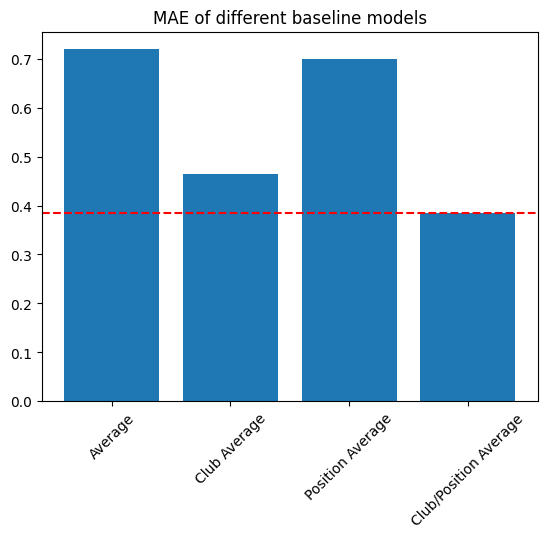

In [89]:
plt.bar(y_pos, MAE)
plt.title("MAE of different baseline models")
plt.xticks(y_pos, models, rotation = 45)
plt.axhline(y = mae4, color = 'r', ls = '--')

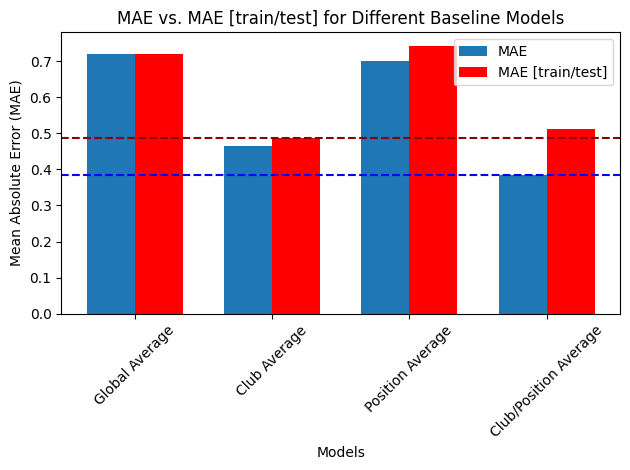

In [96]:
import numpy as np
import matplotlib.pyplot as plt

MAE = [mae1, mae2, mae3, mae4]
MAE_TEST = [mae_test1, mae_test2, mae_test3, mae_test4]
models = ["Global Average", "Club Average", "Position Average", "Club/Position Average"]
y_pos = np.arange(len(models))

# Set the width of each bar
bar_width = 0.35

# Create subplots for the double bar chart
fig, ax = plt.subplots()

# Create bars for MAE
bar1 = ax.bar(y_pos - bar_width/2, MAE, bar_width, label='MAE', align='center')

# Create bars for MAE_TEST
bar2 = ax.bar(y_pos + bar_width/2, MAE_TEST, bar_width, label='MAE [train/test]', align='center', color='r')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('MAE vs. MAE [train/test] for Different Baseline Models')
ax.set_xticks(y_pos)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Show a horizontal line for mae4 (optional)
plt.axhline(y=mae4, color='b', ls='--', label='MAE4')
plt.axhline(y=mae_test2, color='darkred', ls ='--', label='MAETEST2')

# Show the plot
plt.tight_layout()
plt.show()